Importing libraries...

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Making the Seaborn plots look modern with dark background and gridlines for better readability.
sns.set_style('darkgrid')

In [3]:
# Loading gas dataset...
gas_df=pd.read_csv('https://raw.githubusercontent.com/KeithGalli/matplotlib_tutorial/master/gas_prices.csv')

In [21]:
gas_df.head(3)

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990-01-01,NaN,1.87,3.63,2.65,4.59,3.16,1.0,2.05,2.82,1.16
1,1991-01-01,1.96,1.92,3.45,2.90,4.50,3.46,1.3,2.49,3.01,1.14
2,1992-01-01,1.89,1.73,3.56,3.27,4.53,3.58,1.5,2.65,3.06,1.13


Data Exploration...

In [13]:
# Display the first few rows of the DataFrame
gas_df.head(3)

# Get information about the DataFrame
gas_df.info()

## Descriptive statistics
gas_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         19 non-null     int64  
 1   Australia    18 non-null     float64
 2   Canada       19 non-null     float64
 3   France       19 non-null     float64
 4   Germany      19 non-null     float64
 5   Italy        19 non-null     float64
 6   Japan        19 non-null     float64
 7   Mexico       19 non-null     float64
 8   South Korea  19 non-null     float64
 9   UK           19 non-null     float64
 10  USA          19 non-null     float64
dtypes: float64(10), int64(1)
memory usage: 1.8 KB


,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
count,19.000000,18.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,1999.000000,2.348889,2.086842,4.407895,4.224737,4.645789,3.820526,1.781579,3.835789,4.392632,1.592105
std,5.627314,0.845931,0.786618,1.167531,1.425749,1.146610,0.696615,0.462148,1.226170,1.455170,0.663355
min,1990.000000,1.630000,1.380000,3.410000,2.650000,3.570000,2.820000,1.000000,2.050000,2.820000,1.060000
25%,1994.500000,1.780000,1.590000,3.605000,3.370000,3.805000,3.270000,1.475000,2.910000,3.135000,1.145000
50%,1999.000000,1.955000,1.730000,3.870000,3.530000,4.390000,3.640000,1.790000,3.760000,4.130000,1.230000
75%,2003.500000,2.587500,2.180000,4.700000,4.915000,4.940000,4.320000,2.210000,4.345000,5.130000,1.735000
max,2008.000000,4.450000,4.080000,7.510000,7.750000,7.630000,5.740000,2.450000,6.210000,7.420000,3.270000


In [16]:
gas_df['Year'] = pd.to_datetime(gas_df['Year'], format='%Y')
gas_df['Year'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 19 entries, 0 to 18
Series name: Year
Non-Null Count  Dtype         
--------------  -----         
19 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 284.0 bytes


## Data Visualization...

Line Plot

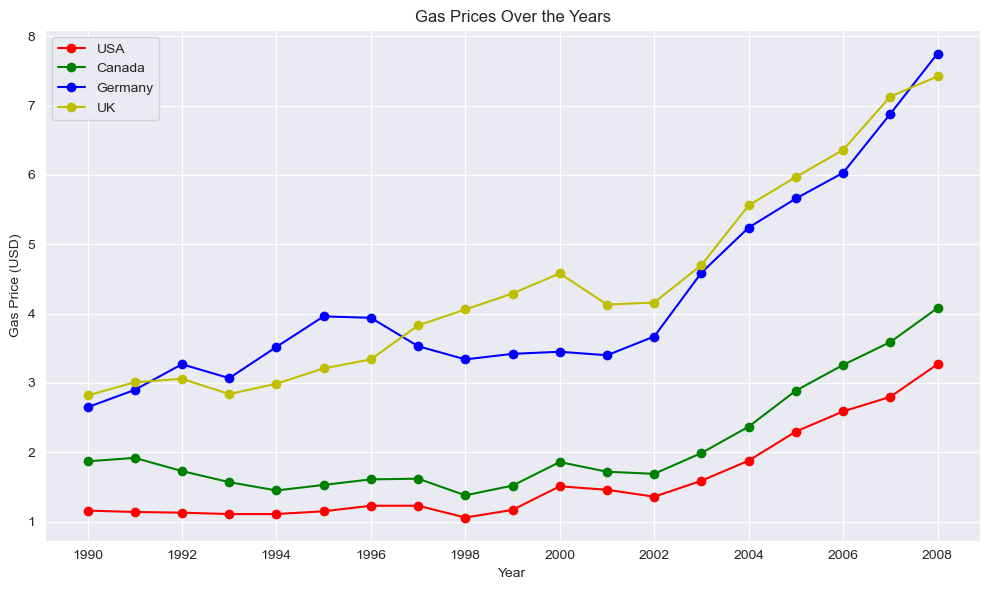

In [19]:
# This line plot visualizes gas prices trends over time across Key Economies: USA, Canada, Germany, and UK (1990-2022)

plt.figure(figsize=(10, 6))

countries = ['USA', 'Canada', 'Germany', 'UK']
colors = ['r', 'g', 'b', 'y']

for country, color in zip(countries, colors):
    plt.plot(gas_df['Year'], gas_df[country], marker='o', label=country, color=color)

plt.xlabel('Year')
plt.ylabel('Gas Price (USD)')
plt.title('Gas Prices Over the Years')
plt.legend()

plt.grid(True)
plt.tight_layout()

plt.savefig('gas_prices(lineplot).png')

plt.show()

Box plot

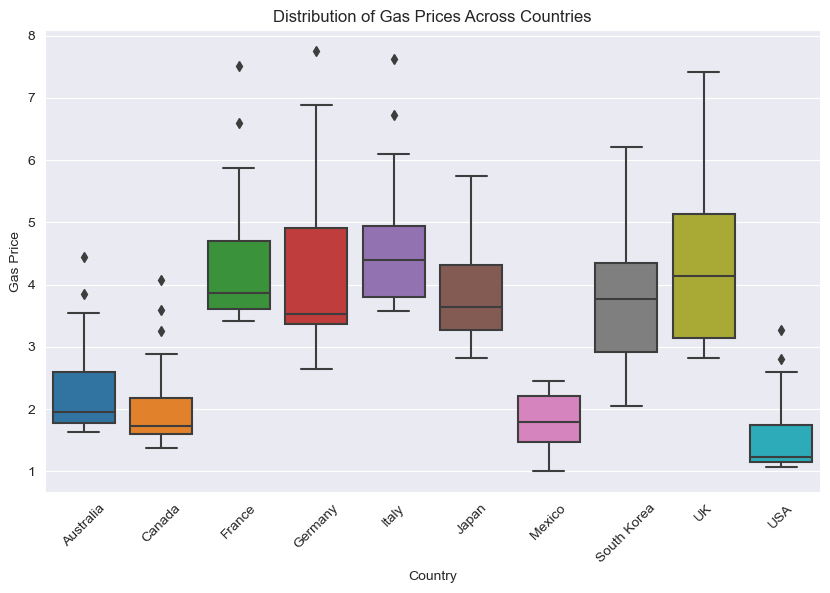

In [24]:
# This box plot represents distribution of Gas Prices Across Countries 

plt.figure(figsize=(10, 6))
sns.boxplot(data=gas_df.drop('Year', axis=1))
plt.title('Distribution of Gas Prices Across Countries')
plt.xlabel('Country')
plt.ylabel('Gas Price')
plt.xticks(rotation=45)
plt.savefig('gas_prices(boxplot).png')
plt.show()

Bar Plot

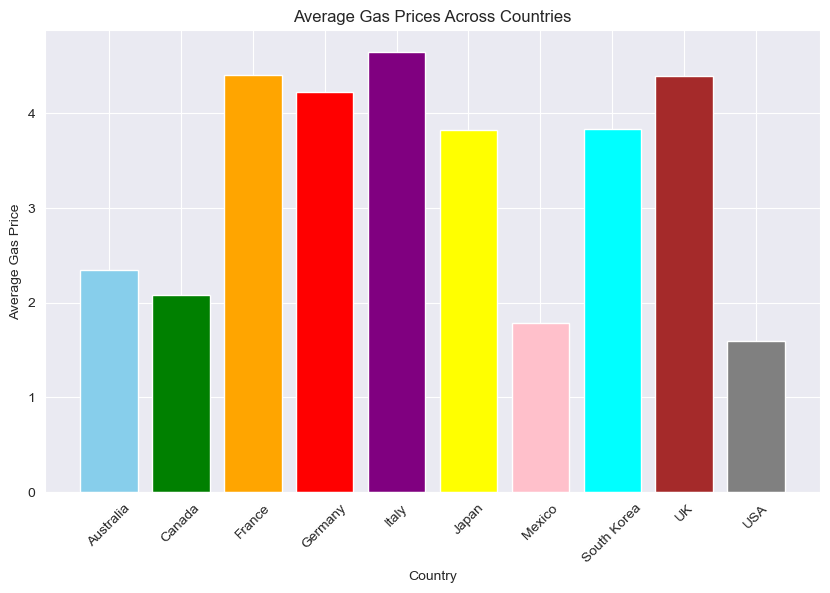

In [29]:
# This bar plot visualizes the average gas prices across different countries

plt.figure(figsize=(10, 6))

colors = {'Australia': 'skyblue', 'Canada': 'green', 'France': 'orange', 
          'Germany': 'red', 'Italy': 'purple', 'Japan': 'yellow', 
          'Mexico': 'pink', 'South Korea': 'cyan', 'UK': 'brown', 'USA': 'gray'}

average_gas_prices = gas_df.drop('Year', axis=1).mean()

for country in average_gas_prices.index:
    plt.bar(country, average_gas_prices[country], color=colors.get(country, 'skyblue'))

plt.title('Average Gas Prices Across Countries')
plt.xlabel('Country')
plt.ylabel('Average Gas Price')
plt.xticks(rotation=45)
plt.savefig('gas_prices(barplot).png')
plt.show()


Stacked Area Plot

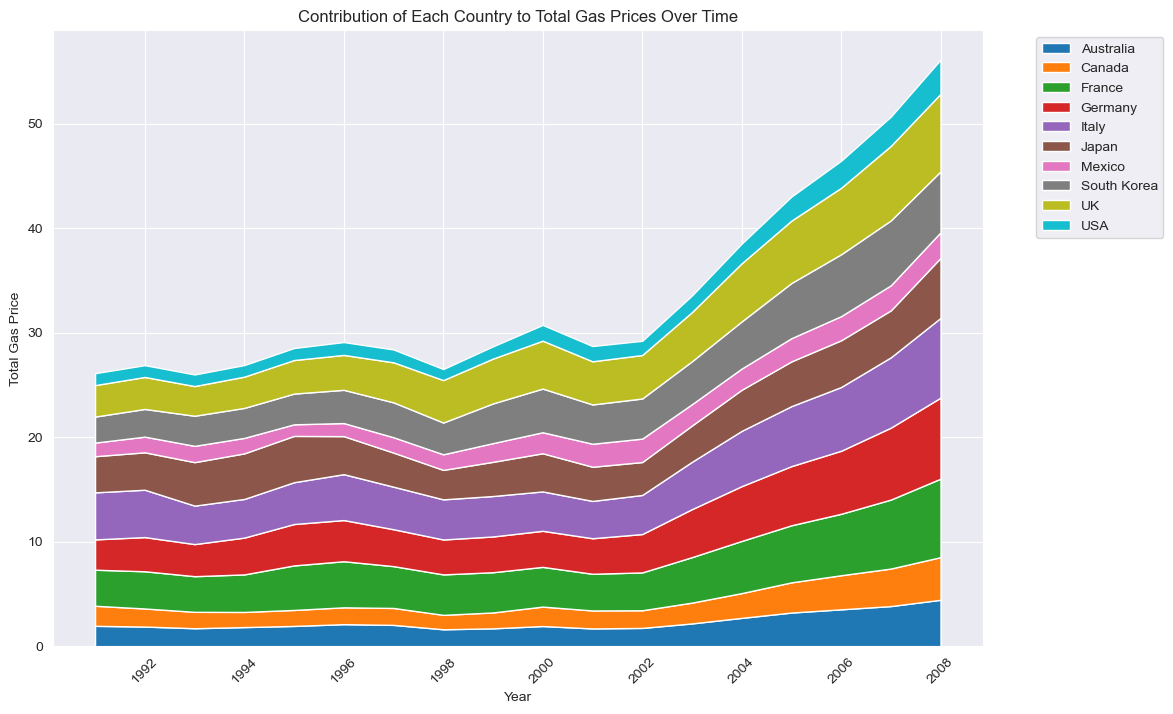

In [33]:
# Contribution of Each Country to Total Gas Prices Over Time
plt.figure(figsize=(12, 8))
plt.stackplot(gas_df['Year'], gas_df.drop('Year', axis=1).T, labels=gas_df.columns[1:])
plt.title('Contribution of Each Country to Total Gas Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Total Gas Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.savefig('gas_prices(stackedareaplot).png')
plt.show()

Heat plot

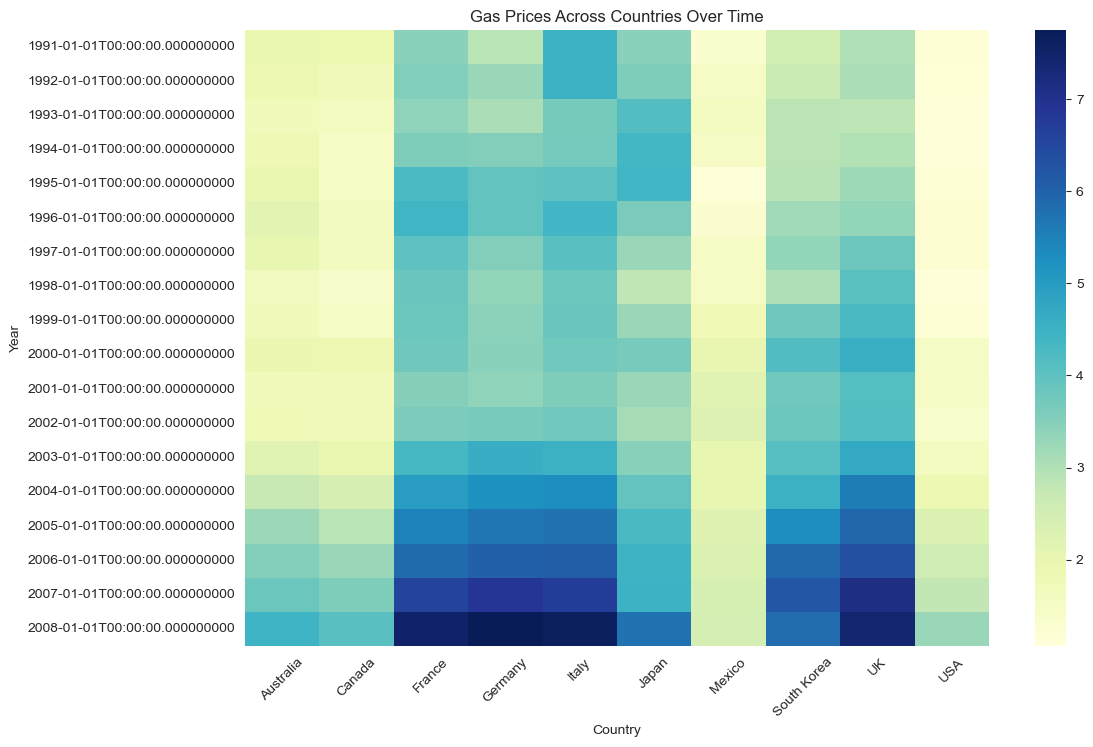

In [36]:
# This heatmap visualizes gas prices across different countries over time
plt.figure(figsize=(12, 8))
sns.heatmap(gas_df.set_index('Year').dropna(), cmap='YlGnBu')
plt.title('Gas Prices Across Countries Over Time')
plt.xlabel('Country')
plt.ylabel('Year')
plt.xticks(rotation=45)
plt.savefig('gas_prices(heatmap).png')
plt.show()

Scatter plot

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


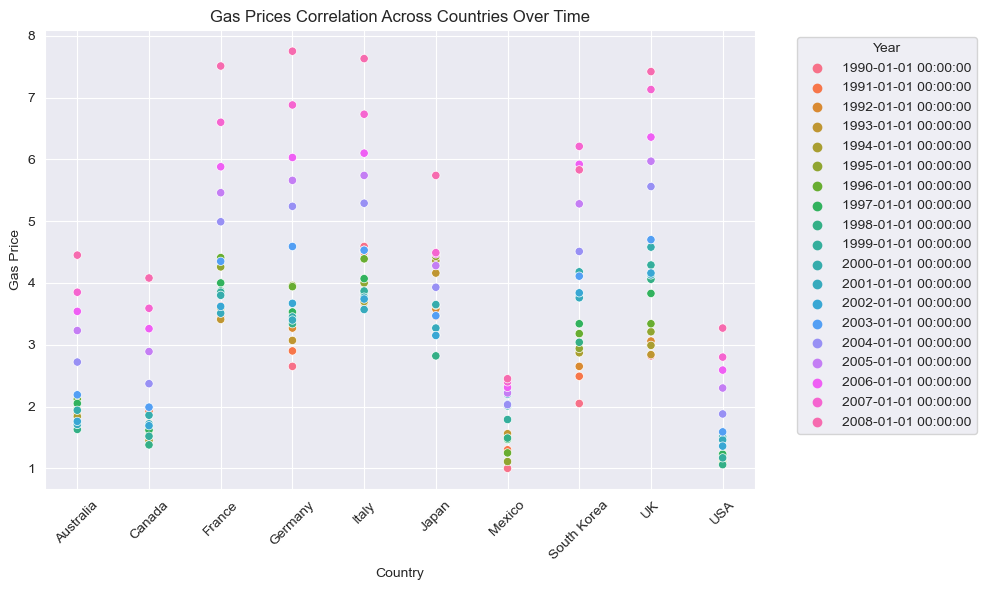

In [51]:
# This plot visualizes the correlation between gas prices across different countries over time.
melted_df = pd.melt(gas_df, id_vars=['Year'], var_name='Country', value_name='Gas Price')

plt.figure(figsize=(10, 6))

sns.scatterplot(data=melted_df, x='Country', y='Gas Price', hue='Year')

plt.title('Gas Prices Correlation Across Countries Over Time')
plt.xlabel('Country')
plt.ylabel('Gas Price')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('gas_prices_scatterplot.png', bbox_inches='tight')
plt.show()